In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from load_data_and_distribution_analisys import split_dataset_v1, plot_confusion_matrix, load_dataset_cleaned

# Un primo esempio

Di seguito riportiamo un semplice modello di Logistic Regression per vedere che lower bound abbiamo per quanto riguarda le metriche di valutazione (accuratezza, recall, precisione, f1_score).

In [3]:
dataset_cleaned = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1

In [4]:
X_smoke, Y_smoke, X_drink, Y_drink = split_dataset_v1(dataset_cleaned)

In [6]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, Y_smoke, test_size=0.3, random_state=42, stratify=Y_smoke)
simple_classifier = LogisticRegression()
simple_classifier.fit(X_train_s, y_train_s)
y_pred = simple_classifier.predict(X_test_s)
report = classification_report(y_test_s, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.69      0.90      0.78    179631
         2.0       0.39      0.11      0.17     52115
         3.0       0.50      0.36      0.42     63815

    accuracy                           0.65    295561
   macro avg       0.53      0.46      0.46    295561
weighted avg       0.60      0.65      0.60    295561



/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


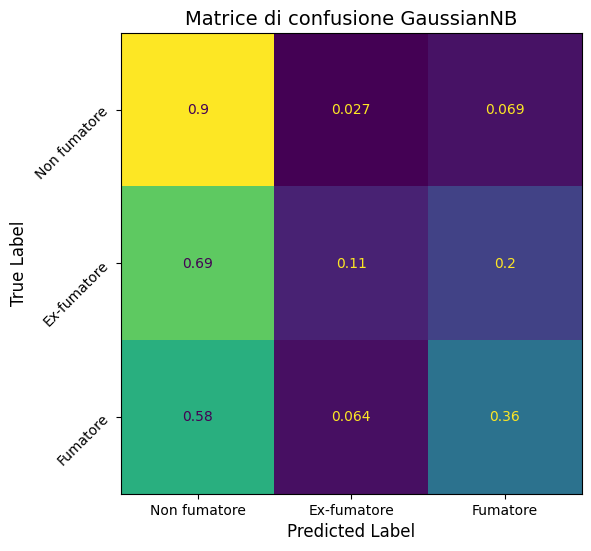

In [7]:
plot_confusion_matrix(y_test_s, y_pred, ["Non fumatore", "Ex-fumatore", "Fumatore"], "Matrice di confusione GaussianNB")

In [8]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, Y_drink, test_size=0.3, random_state=42, stratify=Y_drink)
simple_classifier = LogisticRegression()
simple_classifier.fit(X_train_d, y_train_d)
y_pred = simple_classifier.predict(X_test_d)
report = classification_report(y_test_d, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71    147603
           1       0.71      0.69      0.70    147958

    accuracy                           0.70    295561
   macro avg       0.70      0.70      0.70    295561
weighted avg       0.70      0.70      0.70    295561



/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


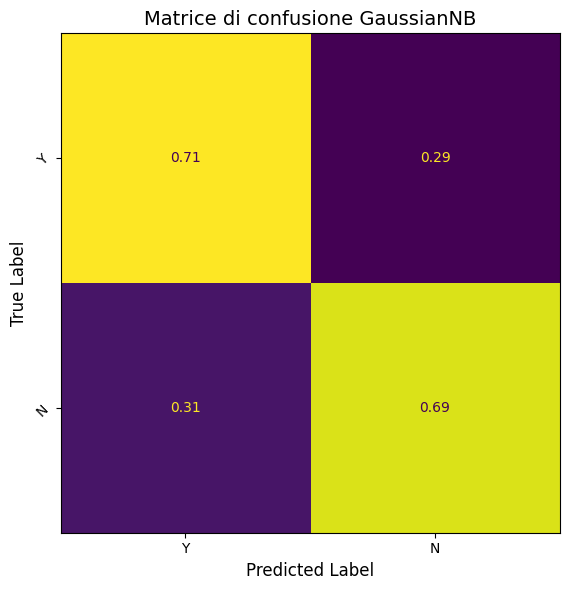

In [9]:
plot_confusion_matrix(y_test_d, y_pred, ["Y", "N"], "Matrice di confusione GaussianNB")

__Prossimi passi__: da adesso in poi l'obiettivo sarà migliorare sempre di più le metriche delle predizioni sia per il caso del fumo che del bere, utilizzando modelli di apprendimento diversi e sfruttando tecniche di normalizzazione, feature selection, dimensionality reduction, encoding, etc. 